Error: File not found at C:\Users\jullu\weight_data.csv
Please verify the file path and try again.
Model Coefficients:
Height: 32.84
Age: 0.32
Gender: 14.62
Intercept: -3.06
R-squared: -11.25


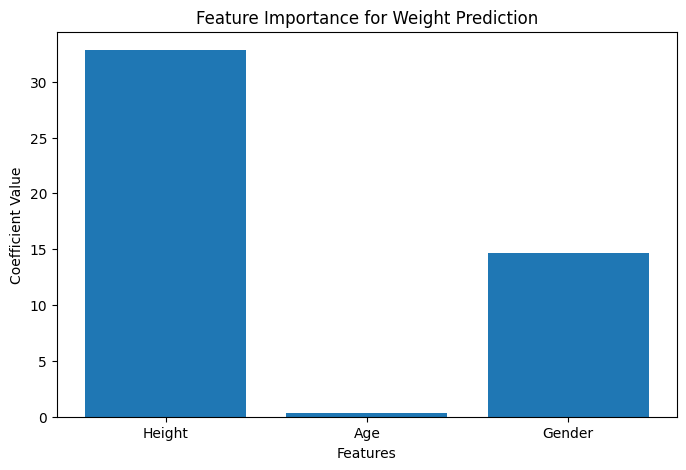

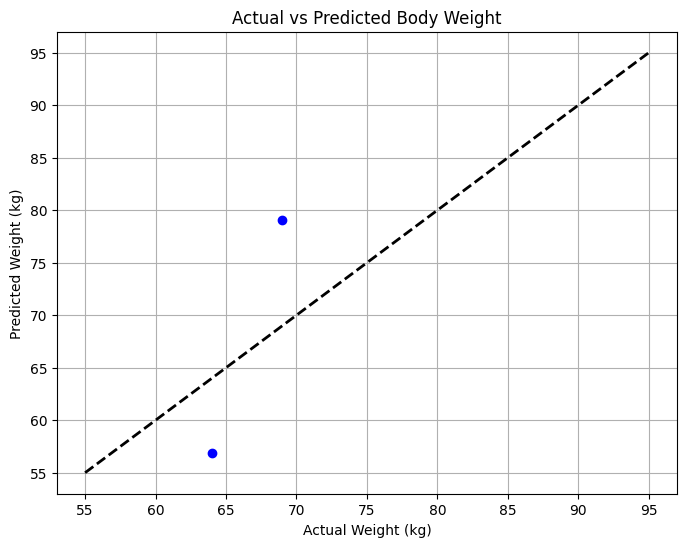

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Specify the full path to your CSV file
file_path = r'C:\Users\jullu\weight_data.csv'  # The 'r' before the string makes it a raw string

# Load data from CSV file
try:
    weight_data = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please verify the file path and try again.")
    exit()

# Convert Gender to numerical values (Male=1, Female=0)
le = LabelEncoder()
weight_data['Gender'] = le.fit_transform(weight_data['Gender'])

# Rest of your code remains the same...
X = weight_data[['Height', 'Age', 'Gender']]
y = weight_data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Coefficients:")
print(f"Height: {model.coef_[0]:.2f}")
print(f"Age: {model.coef_[1]:.2f}")
print(f"Gender: {model.coef_[2]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

# Visualization code remains the same...
features = X.columns
importance = model.coef_
plt.figure(figsize=(8, 5))
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance for Weight Prediction')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Actual vs Predicted Body Weight')
plt.grid(True)
plt.show()